In [2]:
import pandas as pd
import numpy as np
from  matplotlib import pyplot as plt
pd.options.display.max_columns = None
pd.options.display.width = None 

La visualizacion  es el analisis de datos para explorar los datasets y encontrar inisigths, despues la visualizacion sigue siendo vital para comunicar informacion, contar una historia y que las visualizaciones de los datos sean utiles y faciles de entender

## algunos datos basicos

In [3]:
year = [1950, 1970, 1990, 2010] #years
pop =  [2.519, 3.692, 5.263, 6.972] #population (billions)

## Tipos de plots

### Line plot

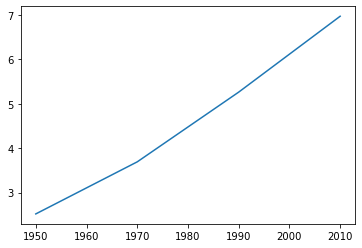

In [4]:
#valores en el eje x son el primer parametro y
#valores en el eje y son el segundo parametro
plt.plot(year, pop)
plt.show()

### Scatter plot

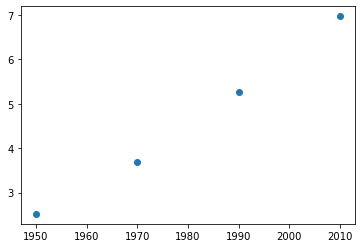

In [5]:
plt.scatter(year, pop)
plt.show()

# The Hans Rosling's GDP percapita Gap Bubble chart



GDP stands for Gross Domestic Product. It basically represents the size of the economy of a country. Divide this by the population and you get the GDP per capita

dataset a usar: `gamminder.csv`

In [6]:
dataframe = pd.read_csv('./datasets/gapminder.csv')
# quitar el limite de columnas a imprimir en un dataframe
print(dataframe)

     Unnamed: 0             country  year  population      cont  life_exp  \
0            11         Afghanistan  2007  31889923.0      Asia    43.828   
1            23             Albania  2007   3600523.0    Europe    76.423   
2            35             Algeria  2007  33333216.0    Africa    72.301   
3            47              Angola  2007  12420476.0    Africa    42.731   
4            59           Argentina  2007  40301927.0  Americas    75.320   
..          ...                 ...   ...         ...       ...       ...   
137        1655             Vietnam  2007  85262356.0      Asia    74.249   
138        1667  West Bank and Gaza  2007   4018332.0      Asia    73.422   
139        1679         Yemen, Rep.  2007  22211743.0      Asia    62.698   
140        1691              Zambia  2007  11746035.0    Africa    42.384   
141        1703            Zimbabwe  2007  12311143.0    Africa    43.487   

          gdp_cap  
0      974.580338  
1     5937.029526  
2     6223.3674

por ahora solo nos interesan las columnas life_exp y gdp_cap

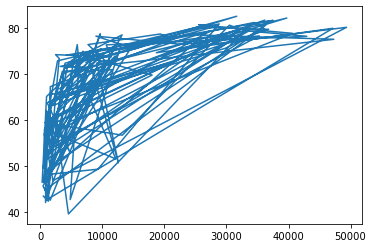

In [7]:
life_exp = np.array(dataframe.life_exp)
gdp_cap = np.array(dataframe.gdp_cap)

plt.plot(gdp_cap, life_exp)
plt.show()

aparentemene no hay relacion lineal evidente con los datos, para apreciar mejor el comportamiento de ambas variables es mejor usar scatterplot la cual no une puntos consecutivos (los cuales puede que no esten ordenados o relacionados en principio)

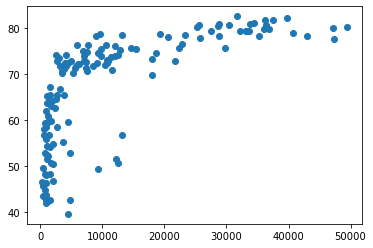

In [8]:
plt.scatter(gdp_cap, life_exp)

usualmente una relacion entre dos varibles se vuelve mas evidene al cambiar la escala de una de estas en alguno de los ejes, la grafica anterior tiene la forma de una funcion logaritmica

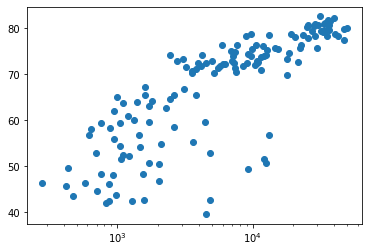

In [9]:
plt.xscale('log')
plt.scatter(gdp_cap, life_exp)
plt.show()

de la grafica anterior se puede ver que a mayor gdp usalmente esto corresponde a una mayor espectativa de vida, por tanto hay una correlacion positiva entre las variables.

Ahora podemos traer mas variables al analisis y hacer preguntas de correlacion entre estas. por ejemplo
¿Hay una relacion entre el numero de habitantes de un pais y la espectativa de vida de este?

para esto debemos extraer los datos de poblacion en una estructura de numpy, luego hacemos una diagrama de dispercion o scatter plot para comparar las variables a nivel general

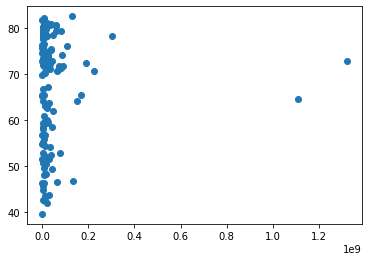

In [10]:
pop = np.array(dataframe.population)

plt.scatter(pop, life_exp)
plt.show()

### Histogramas

sirven para ver la distribucion de los valores de una variable en un conjunto de registros.

un histograma simplre muestra informacion de la distribucion de solo una variable. la funcion `hist()` de `pyplot` recibe como parametros obligatorios, una lista de python o array de numpy. el resto de parametros son opcionales o tienen valores por defecto.

El numero de barras de histogramas es el numero de bins y por default son 10

`The number of bins is pretty important. Too few bins will oversimplify reality and won't show you the details. Too many bins will overcomplicate reality and won't show the bigger picture.`

documentacion de hist: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist


Default 10 bins:


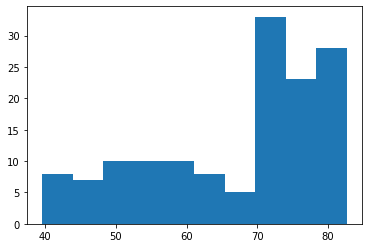


5 bins:


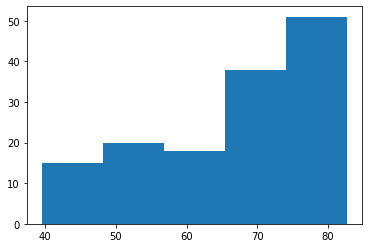


20 bins:


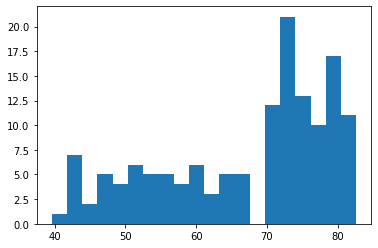

<Figure size 432x288 with 0 Axes>

In [11]:
print('Default 10 bins:')
plt.hist(life_exp)
plt.show()
plt.clf()# limpia la info de plt, para que no se acumule la informacion en una sola grafica 

print('\n5 bins:')
plt.hist(life_exp, bins=5)
plt.show()
plt.clf()

print('\n20 bins:')
plt.hist(life_exp, bins=20)
plt.show()
plt.clf()


### Plot customization

la eleccion del tipo e grafica y la customizacion de la forma en que se muestran los datos dentro de dicha grafica dependen de dos cosas principales: La naturaleza de los datos y la historia que se quiere contar(mensaje e insights a transmitir)

## Axis labels y plot title

es escecial siempre dar nombre a las ejes, ya que esto facilitara conocer las medidas y dimencioes de lo que se esta mostrando

retomemos la grafica de GDP vs expectativa de vida.
para ayadir nombres a los ejes se usa `plt.xlabel('X axis name)` y  `plt.ylabel('Y axis name')`

Tambien podemos poner un nombre a la grafica con `plt.title('plot name')`



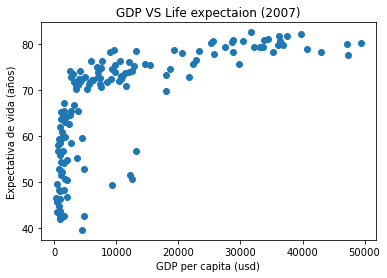

In [12]:
plt.scatter(gdp_cap, life_exp)
plt.xlabel('GDP per capita (usd)')
plt.ylabel('Expectativa de vida (años)')
plt.title('GDP VS Life expectaion (2007)')
plt.show()


tambien se pueden customizar los valores y nombres de los puntos denotados a lo largo de cada eje. estos son los `Ticks`.

`plt.xticks()` o `plt.yticks()` son methodos que reciben uno o dos argumentos basicos: los valores numericos de los ejes y segundo los nombres o labels para estos valores

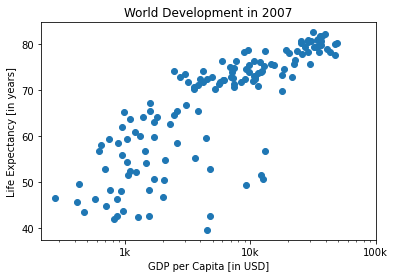

In [13]:
# Scatter plot
plt.scatter(gdp_cap, life_exp)

# Previous customizations
plt.xscale('log') 
plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Life Expectancy [in years]')
plt.title('World Development in 2007')

# Definition of tick_val and tick_lab
tick_val = [1000, 10000, 100000]
tick_lab = ['1k', '10k', '100k']

plt.xticks(tick_val, tick_lab)
plt.show()

## Cambiar el tamaño de cada punto

para que cada punto tenga un tamaño especifico aparte de graficar los valores del eje x vs los valores en el eje y, debe haber un arreglo del mismo tamaño que indique este tamaño relativo entre todos los puntos

lo anterior se logra, al asignar el valor del argumento `s=` en el methodo `plt.scatter()` como un arreglo que contenga valores correspondientes a los conjuntos de datos

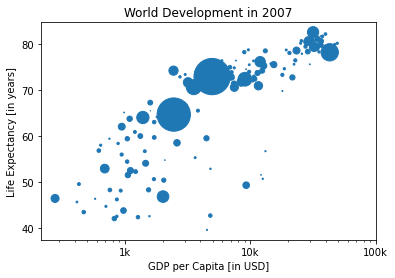

In [14]:

plt.clf()

np_pop = np.array(dataframe.population)
#cambiar la escala de poblacion de numero de habitantes a numero de milloes de habitantes
np_pop = np_pop/1000000

# Update: set s argument to np_pop
plt.scatter(gdp_cap, life_exp, s = np_pop )

# Previous customizations
plt.xscale('log') 
plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Life Expectancy [in years]')
plt.title('World Development in 2007')
plt.xticks([1000, 10000, 100000],['1k', '10k', '100k'])

# Display the plot
plt.show()



### Modificar colores

para asignar un color a cada pais segun su continente, creamos un diccionario para relacionar el nombre de un continente con su color en el grafico. para que cada punto en el scatter plot tenga un color particular, debemos crear un arreglo de colores correspondientes que tenga el mismo tamaño que el numero de puntos.

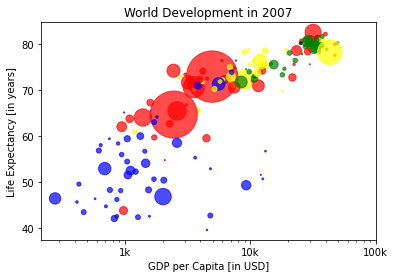

In [34]:
cont_color = {
    'Asia':'red',
    'Europe':'green',
    'Africa':'blue',
    'Americas':'yellow',
    'Oceania':'black'
}

#arreglo de nombres de continentes correspondientes a cada punto
continents = np.array(dataframe.cont)

#arreglo a poblar de colores de cada continente segun el diccionario
colors = []

for i in range(len(continents)):
    current_cont = continents[i]
    colors.append(cont_color[current_cont])

plt.clf()#limpiar cualquier informacion previa


plt.scatter(gdp_cap, life_exp, s = np_pop* 2, c=colors, alpha=0.7)
plt.xscale('log') 
plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Life Expectancy [in years]')
plt.title('World Development in 2007')
plt.xticks([1000, 10000, 100000],['1k', '10k', '100k'])

plt.show()

